# DPDzeroData analyst assignment - 2024

In [92]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data_Analyst_Assignment_Dataset.csv')
df

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA
...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount Pending    24582 non-null  int64  
 1   State             24582 non-null  object 
 2   Tenure            24582 non-null  int64  
 3   Interest Rate     24582 non-null  float64
 4   City              24582 non-null  object 
 5   Bounce String     24582 non-null  object 
 6   Disbursed Amount  24582 non-null  int64  
 7   Loan Number       24582 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB


In [89]:
df.isnull().sum()

Amount Pending      0
State               0
Tenure              0
Interest Rate       0
City                0
Bounce String       0
Disbursed Amount    0
Loan Number         0
Risk Label          0
Tenure Label        0
Channel             0
dtype: int64

In [6]:
df.describe()

,Amount Pending,Tenure,Interest Rate,Disbursed Amount
count,24582.000000,24582.000000,24582.000000,24582.000000
mean,1791.172687,9.415263,0.934960,17705.195468
std,937.565507,3.238904,3.114732,14192.671509
min,423.000000,7.000000,0.000000,2793.000000
25%,1199.000000,8.000000,0.000000,9857.750000
50%,1593.000000,8.000000,0.000000,13592.000000
75%,2083.000000,11.000000,0.000000,19968.000000
max,13349.000000,24.000000,37.920000,141072.000000


In [9]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [11]:
df.tail()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
24577,899,Andhra Pradesh,8,0.0,Chittoor,FEMI,7192,EAX5C
24578,2699,Andhra Pradesh,8,0.0,Krishna,FEMI,21592,5MCE9
24579,1540,Andhra Pradesh,8,0.0,Krishna,FEMI,12320,9HO4Q
24580,824,Andhra Pradesh,8,0.0,Guntur,FEMI,6592,3VV72
24581,2254,Andhra Pradesh,11,0.0,Kurnool,FEMI,24794,18XBC


# Calculate the risk labels for all the borrowers. 

In [12]:
# Calculate the risk labels for all the borrowers. 

def calculate_risk_labels(bounce_string):
    if 'F' in bounce_string:
        return 'Unknown Risk'       # New customers
    elif bounce_string[-1] == 'S' and bounce_string.count('B') == 0:
        return 'Low Risk'           # Customers who have not bounced in the last 6 months
    elif bounce_string.count('B') < 2 and bounce_string[-1] != 'B':
        return 'Medium Risk'        # Customers who have bounced less than twice in the last 6 months
    else:
        return 'High Risk'          # Every other customer


In [14]:
# Apply the function to create a new column for risk labels
df['Risk Label'] = df['Bounce String'].apply(calculate_risk_labels)

# Display the first few rows of the DataFrame with risk labels
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,Low Risk
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk


# label all customers based on where they are in their tenure

In [23]:
# label all customers based on where they are in their tenure

def calculate_tenure_label(bounce_string):
    # Extract the tenure information from the bounce string
    tenure = len(bounce_string) - 1
    
    # Check if the tenure is early (3 months)
    if tenure == 3:
        return 'Early tenure'
    # Check if the tenure is late (3 months away from closing the loan)
    elif tenure == 6:
        return 'Late tenure'
    # All other tenures are considered mid tenure
    else:
        return 'Mid tenure'

In [24]:
# Apply the function to create a new column for tenure labels
df['Tenure Label'] = df['Bounce String'].apply(calculate_tenure_label)

# Display the first few rows of the DataFrame with tenure labels
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Mid tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,Low Risk,Mid tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Mid tenure


# Segment borrowers based on ticket size

In [25]:
# Sort the DataFrame by "Amount Pending"
df_sorted = df.sort_values(by='Amount Pending')
df_sorted

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown Risk,Early tenure
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown Risk,Early tenure
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Mid tenure
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,Unknown Risk,Early tenure
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,Low Risk,Mid tenure
...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,Low Risk,Late tenure
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,Low Risk,Mid tenure
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,Low Risk,Mid tenure
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,Low Risk,Mid tenure


In [27]:
# Calculate the total amount pending
total_amount_pending = df_sorted['Amount Pending'].sum()
total_amount_pending

44030607

In [29]:
# Divide the data into three cohorts
cohort_size = total_amount_pending / 3
cohort_size

14676869.0

In [30]:
current_cohort = 1
current_sum = 0
def assign_cohort(amount_pending):
    global current_cohort
    global current_sum
    current_sum += amount_pending
    if current_sum <= cohort_size:
        return current_cohort
    else:
        current_cohort += 1
        current_sum = amount_pending
        return current_cohort

In [31]:
# Apply the function to create a new column for cohort labels
df_sorted['Cohort'] = df_sorted['Amount Pending'].apply(assign_cohort)
df_sorted

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Cohort
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown Risk,Early tenure,1
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown Risk,Early tenure,1
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Mid tenure,1
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,Unknown Risk,Early tenure,1
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,Low Risk,Mid tenure,1
...,...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,Low Risk,Late tenure,3
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,Low Risk,Mid tenure,3
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,Low Risk,Mid tenure,3
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,Low Risk,Mid tenure,3


In [32]:
# Function to map cohort label to ticket size label
def map_ticket_size(cohort):
    if cohort == 1:
        return 'Low ticket size'
    elif cohort == 2:
        return 'Medium ticket size'
    else:
        return 'High ticket size'

In [34]:
# Apply the function to create a new column for ticket size labels
df_sorted['Ticket Size'] = df_sorted['Cohort'].apply(map_ticket_size)
df_sorted.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Cohort,Ticket Size
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown Risk,Early tenure,1,Low ticket size
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown Risk,Early tenure,1,Low ticket size
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Mid tenure,1,Low ticket size
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,Unknown Risk,Early tenure,1,Low ticket size
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,Low Risk,Mid tenure,1,Low ticket size


# Give channel spend recommendations

In [38]:
# Function to allocate channel based on borrower characteristics
def allocate_channel(borrower):
    # Whatsapp Bot Channel Criteria
    if borrower['Risk Label'] == 'Low Risk' or 'F' in borrower['Bounce String'] or borrower['Amount Pending'] < 100:
        return 'Whatsapp Bot'
    # Voice Bot Channel Criteria
    elif borrower['Bounce String'].count('B') <= 2 and borrower['Amount Pending'] <= 500:
        return 'Voice Bot'
    # Human Calling Channel (default)
    else:
        return 'Human Calling'

In [39]:
# Apply the function to create a new column for channel allocation
df['Channel'] = df.apply(allocate_channel, axis=1)
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Channel
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid tenure,Whatsapp Bot
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Mid tenure,Human Calling
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,Low Risk,Mid tenure,Whatsapp Bot
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid tenure,Whatsapp Bot
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Mid tenure,Human Calling


In [40]:
df['Channel'].value_counts()

Channel
Whatsapp Bot     20664
Human Calling     3917
Voice Bot            1
Name: count, dtype: int64

# Summary of Borrowers Based on Risk

In [42]:
import matplotlib.pyplot as plt
# Summary based on risk
risk_summary = df['Risk Label'].value_counts()
risk_summary

Risk Label
Low Risk        17442
High Risk        3918
Unknown Risk     3222
Name: count, dtype: int64

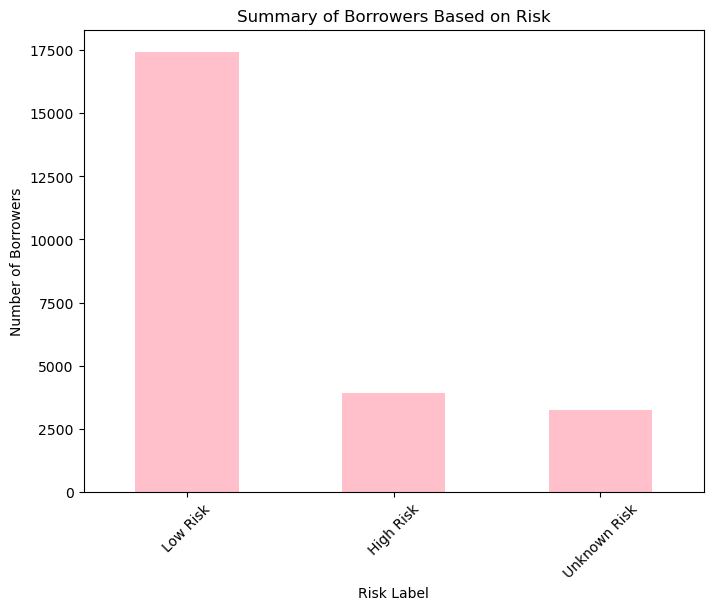

In [48]:
# Plot
plt.figure(figsize=(8, 6))
risk_summary.plot(kind='bar', color='pink')
plt.title('Summary of Borrowers Based on Risk')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

# Summary of Borrowers Based on Ticket Sizes

In [50]:
# Summary based on ticket sizes
ticket_size_summary = df_sorted['Ticket Size'].value_counts()
ticket_size_summary

Ticket Size
Low ticket size       12296
Medium ticket size     7731
High ticket size       4555
Name: count, dtype: int64

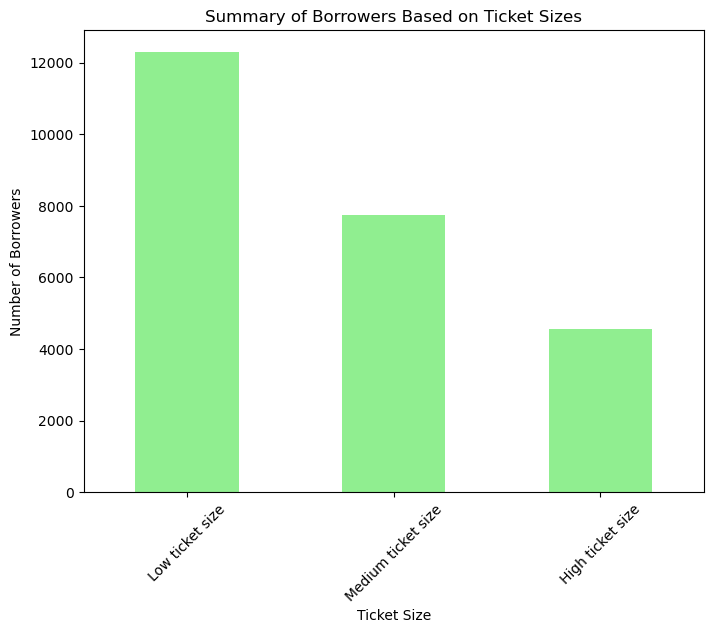

In [53]:
# Plot
plt.figure(figsize=(8, 6))
ticket_size_summary.plot(kind='bar', color='lightgreen')
plt.title('Summary of Borrowers Based on Ticket Sizes')
plt.xlabel('Ticket Size')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

# Summary of Borrowers Based on Tenure Completion:

In [54]:
# Summary based on tenure completion
tenure_completion_summary = df['Tenure Label'].value_counts()
tenure_completion_summary

Tenure Label
Mid tenure      16840
Early tenure     6399
Late tenure      1343
Name: count, dtype: int64

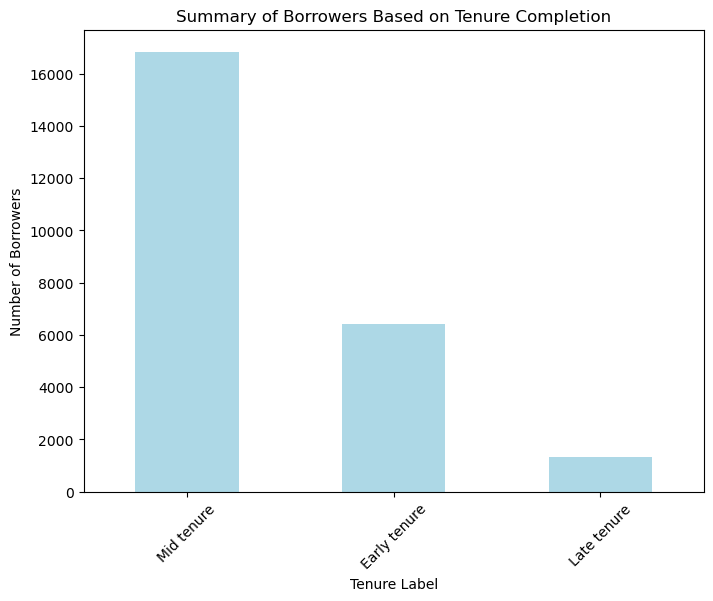

In [59]:
# Plot
plt.figure(figsize=(8, 6))
tenure_completion_summary.plot(kind='bar', color='lightblue')
plt.title('Summary of Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

# Spend recommendation

* Segmentation based on Borrower Characteristics:
    Borrowers are segmented based on their risk level, repayment behavior, and other relevant characteristics 
    such as loan amount tenure etc.
    
* Optimized Channel Allocation:
    Different communication channels (such as Whatsapp bot, Voice bot, and Human calling) are allocated to 
    borrower segments based on their characteristics and response.
    
* Effective Risk Management 
     Sorting borrowers by risk and repayment helps lenders to focus on those who might struggle to pay back without assistance.

In [91]:
# Analysis

In [63]:
# distribution of borrowers across states and cities

# Top 5 states with the highest number of borrowers
top_states = df['State'].value_counts().head(5)
print("Top 5 States with the highest number of borrowers:\n")
print(top_states)

Top 5 States with the highest number of borrowers:

State
Maharashtra       6793
Madhya Pradesh    4850
Kerala            4116
Tamil Nadu        3526
Karnataka         2205
Name: count, dtype: int64


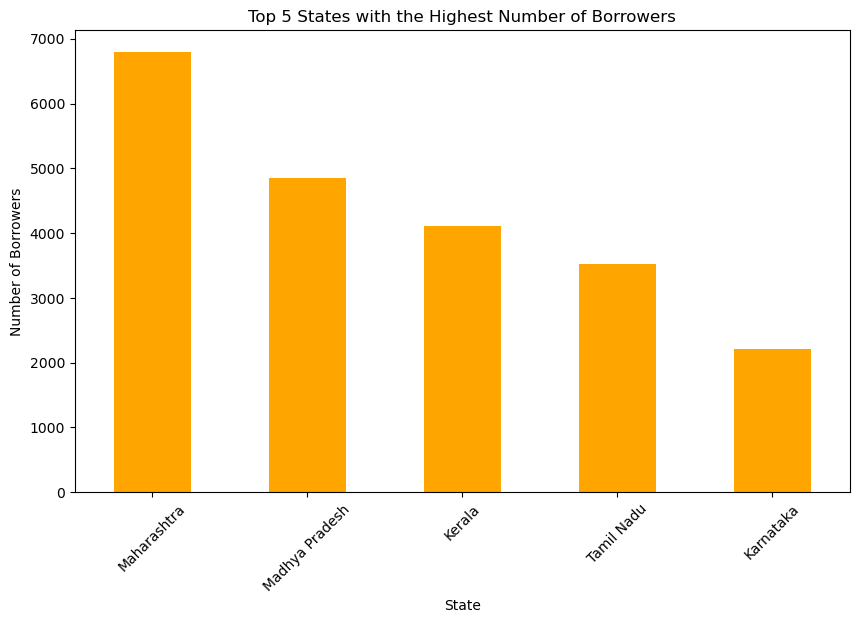

In [84]:
# Plot top states with the highest number of borrowers
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='orange')
plt.title('Top 5 States with the Highest Number of Borrowers')
plt.xlabel('State')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

In [64]:
# Top 5 cities with the highest number of borrowers
top_cities = df['City'].value_counts().head(5)
print("\nTop 5 Cities with the highest number of borrowers:\n")
print(top_cities)


Top 5 Cities with the highest number of borrowers:

City
Pune          1780
Bangalore      925
Hyderabad      784
Aurangabad     693
Indore         637
Name: count, dtype: int64


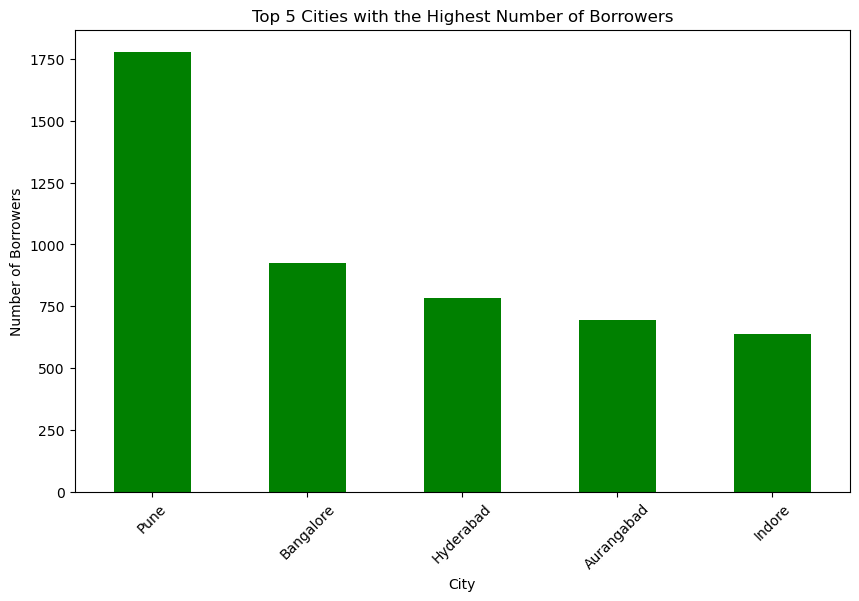

In [88]:
# Plot top cities with the highest number of borrowers
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='green')
plt.title('Top 5 Cities with the Highest Number of Borrowers')
plt.xlabel('City')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Average disbursed amount
average_disbursed_amount = df['Disbursed Amount'].mean()
print("Average Disbursed Amount:")
average_disbursed_amount

Average Disbursed Amount:


17705.195468228787

In [70]:
# Tenure distribution
tenure_distribution = df['Tenure'].value_counts()
print("Tenure Distribution:\n")
print(tenure_distribution)

Tenure Distribution:

Tenure
8     16533
11     4493
7       901
24      795
10      754
15      689
14      245
18      143
17       29
Name: count, dtype: int64


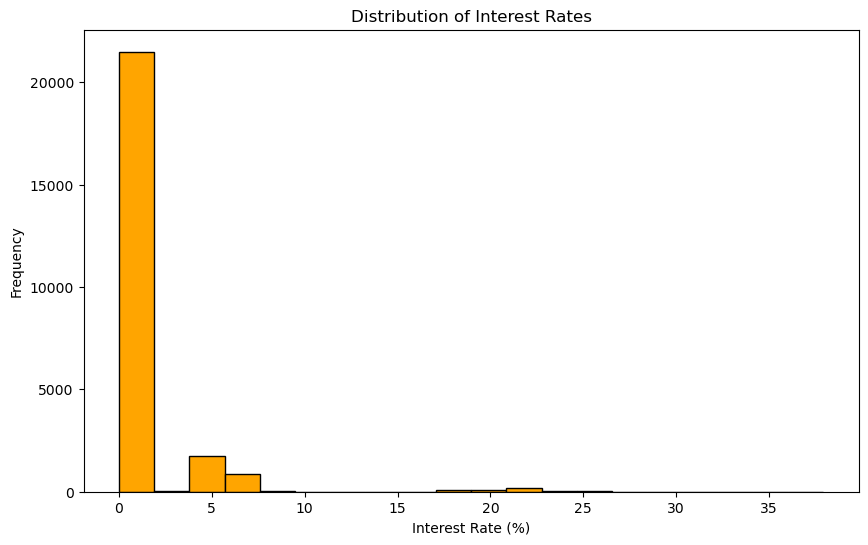

In [75]:
# Plot histogram of interest rates
plt.figure(figsize=(10, 6))
plt.hist(df['Interest Rate'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

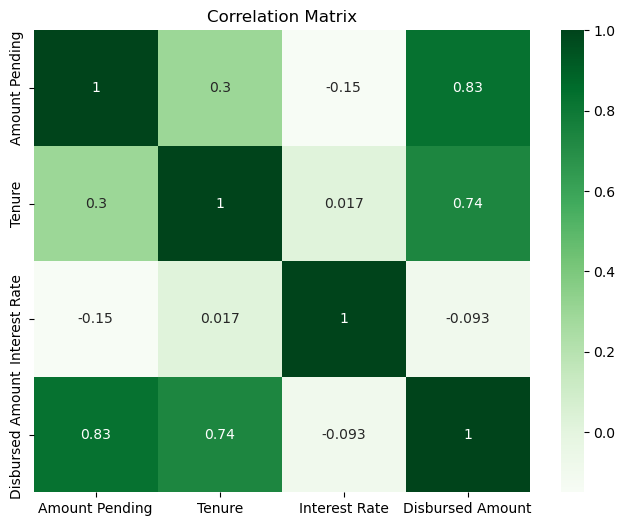

In [95]:
# Correlation analysis
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df[['Amount Pending', 'Tenure', 'Interest Rate', 'Disbursed Amount']].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()